In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import cv2 as cv
import os

In [6]:
carpeta = "../plantvillage_dataset/grayscale/"

Found 2801 images belonging to 2 classes.
Found 699 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 25s 274ms/step - accuracy: 0.5565 - loss: 0.7098 - val_accuracy: 0.5714 - val_loss: 0.6275
Epoch 2/10
 1/87 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.6562 - loss: 0.6489

c:\Users\aasal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6562 - loss: 0.6489 - val_accuracy: 0.5640 - val_loss: 0.6414
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.6356 - loss: 0.6097 - val_accuracy: 0.7976 - val_loss: 0.4455
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7500 - loss: 0.4884 - val_accuracy: 0.8065 - val_loss: 0.4348
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - accuracy: 0.8224 - loss: 0.3793 - val_accuracy: 0.9003 - val_loss: 0.2288
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8750 - loss: 0.3780 - val_accuracy: 0.9390 - val_loss: 0.1553
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.8823 - loss: 0.2620 - val_accuracy: 0.9464 - val_loss: 0.1402
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8750 - loss: 0.2507 - val_accuracy: 0.9583 - val_loss: 0.1135
Epoch 9/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.9325 - loss: 0.1688 - val_accuracy: 0.9583 - val_loss

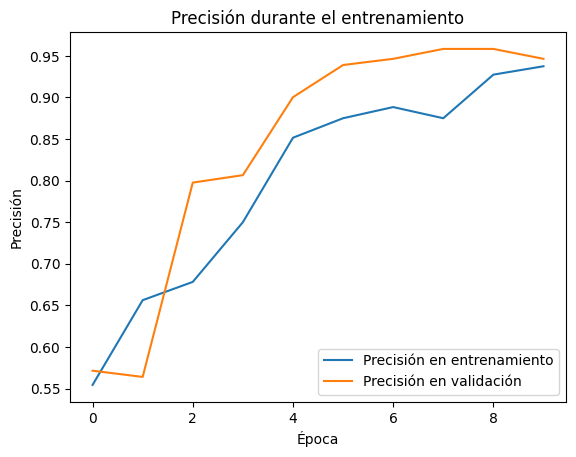

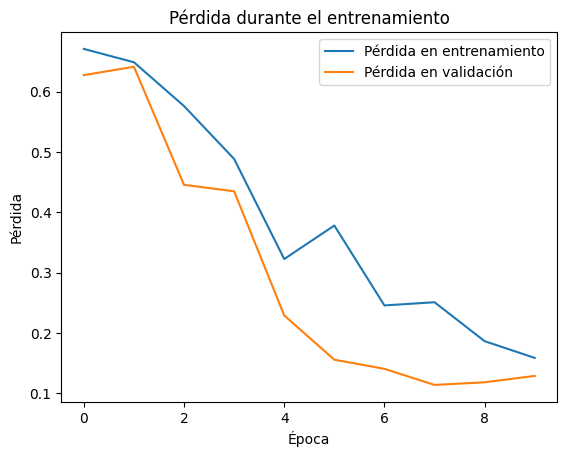

In [7]:
# Importar librerías necesarias
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 1. Configurar rutas y parámetros
dataset_path = carpeta # Cambia esto a la ruta de tu dataset
target_size = (128, 128)  # Redimensionar a 128x128
batch_size = 32
epochs = 10

# 2. Preprocesamiento y aumento de datos
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalización de píxeles
    rotation_range=20,  # Rotación aleatoria
    width_shift_range=0.2,  # Desplazamiento horizontal aleatorio
    height_shift_range=0.2,  # Desplazamiento vertical aleatorio
    horizontal_flip=True,  # Volteo horizontal aleatorio
    validation_split=0.2  # 20% de los datos para validación
)

# 3. Cargar solo las imágenes de Tomato___healthy y Tomato___sick
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    color_mode='grayscale',  # Cargar en escala de grises
    batch_size=batch_size,
    class_mode='binary',  # Clasificación binaria
    classes=['Tomato___healthy', 'Tomato___Late_blight'],  # Solo estas dos clases
    subset='training'  # Conjunto de entrenamiento
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    color_mode='grayscale',  # Cargar en escala de grises
    batch_size=batch_size,
    class_mode='binary',  # Clasificación binaria
    classes=['Tomato___healthy', 'Tomato___Late_blight'],  # Solo estas dos clases
    subset='validation'  # Conjunto de validación
)

# 4. Construir el modelo
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# 5. Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Pérdida para clasificación binaria
              metrics=['accuracy'])

# 6. Resumen del modelo
model.summary()

# 7. Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

# 8. Evaluar el modelo
loss, accuracy = model.evaluate(validation_generator)
print(f"Pérdida en validación: {loss}")
print(f"Precisión en validación: {accuracy}")

# 9. Guardar el modelo
model.save("modelo_tomate_sano_Late_blight.keras")

# 10. Visualizar el rendimiento del modelo
# Gráfico de precisión
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Gráfico de pérdida
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [ ]:
# Importar librerías necesarias
import cv2
import numpy as np
import tensorflow as tf
import pyautogui
from PIL import Image

# 1. Cargar el modelo entrenado
model = tf.keras.models.load_model("modelo_tomate_sano_Late_blight.keras")

# 2. Definir el tamaño de la región de la pantalla a capturar
screen_width, screen_height = 400, 400  # Resolución

# 3. Definir las etiquetas de las clases
class_labels = {0: "Tomate Sano", 1: "Tomate Enfermo"}

# 4. Función para preprocesar la imagen capturada
def preprocess_image(image):
    # Convertir a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Redimensionar a 128x128 (tamaño esperado por el modelo)
    resized_image = cv2.resize(gray_image, (128, 128))
    # Normalizar los valores de píxeles
    normalized_image = resized_image / 255.0
    # Expandir dimensiones para que coincida con la entrada del modelo (128, 128, 1)
    input_image = np.expand_dims(normalized_image, axis=-1)
    input_image = np.expand_dims(input_image, axis=0)  # Añadir dimensión del batch
    return input_image

# 5. Función para predecir si la planta es sana o enferma
def predict_plant(image):
    # Preprocesar la imagen
    input_image = preprocess_image(image)
    # Realizar la predicción
    prediction = model.predict(input_image)
    # Obtener la clase predicha
    predicted_class = 1 if prediction > 0.5 else 0
    # Obtener la confianza de la predicción
    confidence = prediction[0][0] if predicted_class == 1 else 1 - prediction[0][0]
    return predicted_class, confidence

# 6. Capturar la pantalla en tiempo real y realizar predicciones
print("Iniciando detección en tiempo real...")
while True:
    # Capturar la pantalla
    screenshot = pyautogui.screenshot(region=(100, 100, screen_width, screen_height))
    screenshot = np.array(screenshot)  # Convertir a un array de NumPy
    screenshot = cv2.cvtColor(screenshot, cv2.COLOR_RGB2BGR)  # Convertir a BGR (OpenCV usa BGR por defecto)

    # Realizar la predicción
    predicted_class, confidence = predict_plant(screenshot)

    # Mostrar el resultado en la pantalla
    if confidence > 0.7:  # Umbral de confianza
        label = class_labels[predicted_class]
    else:
        label = "Desconocido"

    # Mostrar el texto en la pantalla
    cv2.putText(screenshot, f"Estado: {label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    cv2.putText(screenshot, f"Confianza: {confidence:.2f}", (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Mostrar la imagen en una ventana
    cv2.imshow("Detección en tiempo real", screenshot)

    # Salir del bucle si se presiona la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cerrar la ventana
cv2.destroyAllWindows()